### Ba thư mục theo ba nhóm dữ liệu
- Hima: Là dữ liệu Ảnh vệ tinh
   + Mỗi thư mục chứa một lớp (Band/phổ) của ảnh vệ tinh
- ERA5: Là dữ liệu khí tượng/phụ trợ
- Precipitation: Dữ liệu mưa, gồm AWS, IMERG_E và Radar

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 47.7 MB/s eta 0:00:00


In [2]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import matplotlib.gridspec as gridspec
import pandas as pd

In [3]:
hima_root = "/kaggle/input/dataai/DATA_SV/Hima" 
era5_root = "/kaggle/input/dataai/DATA_SV/ERA5"
pre_root = "/kaggle/input/dataai/DATA_SV/Precipitation"

In [4]:
def analyze_data(root_dir):
    file_count_per_day = defaultdict(int)
    missing_dates = []

    # Duyệt từng băng tần
    for band in os.listdir(root_dir):
        band_path = os.path.join(root_dir, band)
        if not os.path.isdir(band_path):
            continue

        # Duyệt từng năm
        for year in os.listdir(band_path):
            year_path = os.path.join(band_path, year)
            if not os.path.isdir(year_path):
                continue

            # Duyệt từng tháng
            for month in os.listdir(year_path):
                month_path = os.path.join(year_path, month)
                if not os.path.isdir(month_path):
                    continue

                # Duyệt từng ngày
                for day in os.listdir(month_path):
                    day_path = os.path.join(month_path, day)
                    if os.path.isdir(day_path):
                        file_count = len([f for f in os.listdir(day_path) if f.endswith(".tif")])
                        file_count_per_day[f"{year}-{month}-{day}"] += file_count

    # Kiểm tra ngày bị thiếu dữ liệu
    expected_days = set()
    for year in ["2019", "2020"]:
        for month in ["04", "10"]:
            num_days = calendar.monthrange(int(year), int(month))[1]  # Số ngày thực tế của tháng
            for day in range(1, num_days + 1):
                day_str = f"{year}-{month}-{day:02d}"
                expected_days.add(day_str)
                if day_str not in file_count_per_day:
                    missing_dates.append(day_str)

    print("Tổng số file mỗi ngày:")
    for date, count in sorted(file_count_per_day.items()):
        print(f"{date}: {count} files")

    print("\nNgày bị thiếu dữ liệu:")
    print(missing_dates)

    return file_count_per_day, missing_dates


# Hima

In [5]:
file_counts_hima, missing_days_hima = analyze_data(hima_root)

Tổng số file mỗi ngày:
2019-04-01: 276 files
2019-04-02: 288 files
2019-04-03: 289 files
2019-04-04: 290 files
2019-04-05: 296 files
2019-04-06: 296 files
2019-04-07: 294 files
2019-04-08: 295 files
2019-04-09: 292 files
2019-04-10: 272 files
2019-04-11: 276 files
2019-04-12: 290 files
2019-04-13: 291 files
2019-04-14: 293 files
2019-04-15: 292 files
2019-04-16: 292 files
2019-04-17: 292 files
2019-04-18: 289 files
2019-04-19: 289 files
2019-04-20: 261 files
2019-04-21: 287 files
2019-04-22: 288 files
2019-04-23: 263 files
2019-04-24: 279 files
2019-04-25: 281 files
2019-04-26: 14 files
2019-10-01: 287 files
2019-10-02: 278 files
2019-10-03: 276 files
2019-10-04: 275 files
2019-10-05: 275 files
2019-10-06: 276 files
2019-10-07: 278 files
2019-10-08: 274 files
2019-10-09: 285 files
2019-10-10: 283 files
2019-10-11: 274 files
2019-10-12: 275 files
2019-10-13: 279 files
2019-10-14: 14 files
2019-10-15: 271 files
2019-10-16: 284 files
2019-10-17: 279 files
2019-10-18: 275 files
2019-10-19:

In [6]:
def plot_file_counts(file_counts):
    dates = list(sorted(file_counts.keys()))  
    counts = [file_counts[date] for date in dates]  

    plt.figure(figsize=(16, 7), dpi=100) 
    plt.bar(dates, counts, color='skyblue', edgecolor='navy', linewidth=1, alpha=0.7, width=0.8)
    
    step = max(1, len(dates) // 20)  
    plt.xticks(dates[::step], rotation=45, ha="right", fontsize=9)
    
    plt.xlabel("Ngày", fontweight='bold')
    plt.ylabel("Số lượng file", fontweight='bold')
    plt.title("Phân Phối Số Lượng File Theo Ngày", fontsize=15, fontweight='bold', pad=20)
    
    plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
    
    mean_count = sum(counts) / len(counts)
    plt.axhline(y=mean_count, color='red', linestyle='--', label=f'Trung bình: {mean_count:.2f}')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

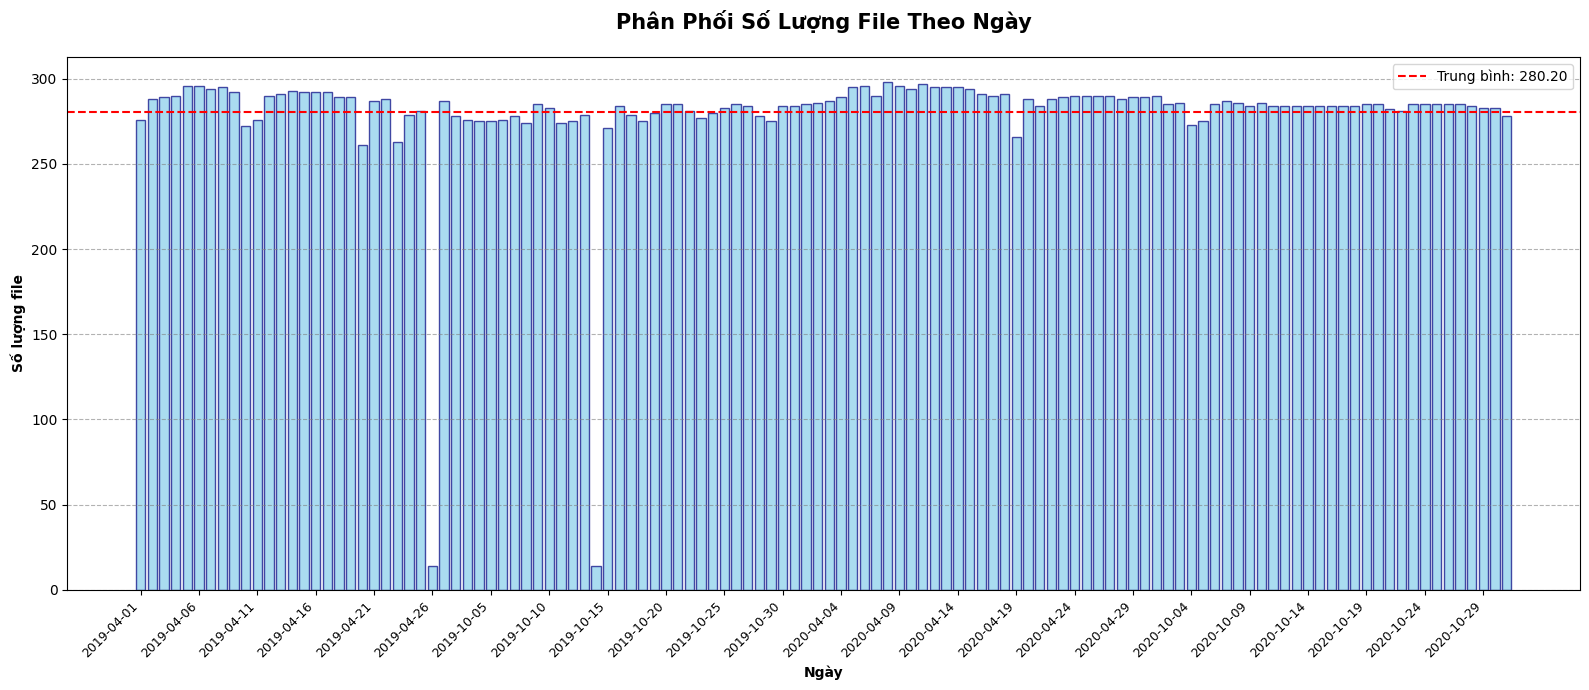

In [7]:
plot_file_counts(file_counts_hima)

In [8]:
def analyze_by_band(root_dir):
    band_data = defaultdict(lambda: defaultdict(int))  # Lưu theo {năm-tháng: {băng tần: số lượng file}}

    for band in os.listdir(root_dir):  # Duyệt từng băng tần (B01, B02, ..., IRB)
        band_path = os.path.join(root_dir, band)
        if not os.path.isdir(band_path):
            continue

        for year in os.listdir(band_path):
            year_path = os.path.join(band_path, year)
            if not os.path.isdir(year_path):
                continue

            for month in os.listdir(year_path):
                month_path = os.path.join(year_path, month)
                if not os.path.isdir(month_path):
                    continue

                total_files = 0  # Tổng số file trong tháng
                for day in os.listdir(month_path):
                    day_path = os.path.join(month_path, day)
                    if os.path.isdir(day_path):
                        total_files += len([f for f in os.listdir(day_path) if f.endswith(".tif")])
                
                # Lưu số lượng file vào {năm-tháng: {băng tần: số file}}
                band_data[f"{year}-{month}"][band] = total_files

    return band_data

In [9]:
band_counts_hima = analyze_by_band(hima_root)

for time, bands in band_counts_hima.items():
    print(f"\nSố lượng file trong tháng {time}:")
    for band, count in bands.items():
        print(f"  {band}: {count} files")



Số lượng file trong tháng 2020-10:
  B10B: 744 files
  B09B: 744 files
  B11B: 744 files
  B12B: 744 files
  WVB: 744 files
  I2B: 744 files
  B04B: 353 files
  B06B: 314 files
  IRB: 744 files
  B14B: 744 files
  B05B: 336 files
  VSB: 352 files
  B16B: 744 files
  I4B: 744 files

Số lượng file trong tháng 2020-04:
  B10B: 720 files
  B09B: 720 files
  B11B: 720 files
  B12B: 720 files
  WVB: 720 files
  I2B: 720 files
  B04B: 393 files
  B06B: 372 files
  IRB: 720 files
  B14B: 720 files
  B05B: 378 files
  VSB: 409 files
  B16B: 720 files
  I4B: 673 files

Số lượng file trong tháng 2019-10:
  B10B: 719 files
  B09B: 719 files
  B11B: 719 files
  B12B: 719 files
  WVB: 719 files
  I2B: 719 files
  B04B: 353 files
  B06B: 181 files
  IRB: 719 files
  B14B: 719 files
  B05B: 330 files
  VSB: 345 files
  B16B: 719 files
  I4B: 719 files

Số lượng file trong tháng 2019-04:
  B10B: 594 files
  B09B: 594 files
  B11B: 594 files
  B12B: 594 files
  WVB: 591 files
  I2B: 593 files
  B04B: 3

In [10]:
def analyze_band_files(root_dir, years=["2019", "2020"], months=["04", "10"]):
    data = []
    
    for band in os.listdir(root_dir):
        band_path = os.path.join(root_dir, band)
        if not os.path.isdir(band_path):
            continue
        
        for year in years:
            year_path = os.path.join(band_path, year)
            if not os.path.isdir(year_path):
                continue
            
            for month in months:
                month_path = os.path.join(year_path, month)
                if not os.path.isdir(month_path):
                    continue
                
                file_count = sum(len([f for f in os.listdir(os.path.join(month_path, day)) if f.endswith(".tif")]) 
                                 for day in os.listdir(month_path) if os.path.isdir(os.path.join(month_path, day)))
                
                data.append({'Band': band, 'Year': year, 'Month': month, 'FileCount': file_count})
    
    return pd.DataFrame(data)

def plot_band_file_distribution(df):
    grouped = df.groupby(['Year', 'Month', 'Band'])['FileCount'].sum().reset_index()
    years = sorted(df['Year'].unique())
    
    fig, axes = plt.subplots(1, len(years), figsize=(8 * len(years), 6), sharey=True)
    if len(years) == 1:
        axes = [axes]  
    
    palette = sns.color_palette("viridis", n_colors=len(df['Band'].unique()))
    
    for i, year in enumerate(years):
        year_data = grouped[grouped['Year'] == year]
        
        sns.barplot(x='FileCount', y='Band', hue='Month', data=year_data, ax=axes[i], palette='Set2')
        
        axes[i].set_title(f'Phân Phối File Theo Băng Tần ({year})', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Số Lượng File', fontsize=12)
        axes[i].set_ylabel('Băng Tần', fontsize=12)
        axes[i].legend(title='Tháng', loc='upper right')
        axes[i].grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()
    
    print("Tổng Quan Thống Kê:")
    print(df.groupby(['Band', 'Year', 'Month'])['FileCount'].sum().reset_index())

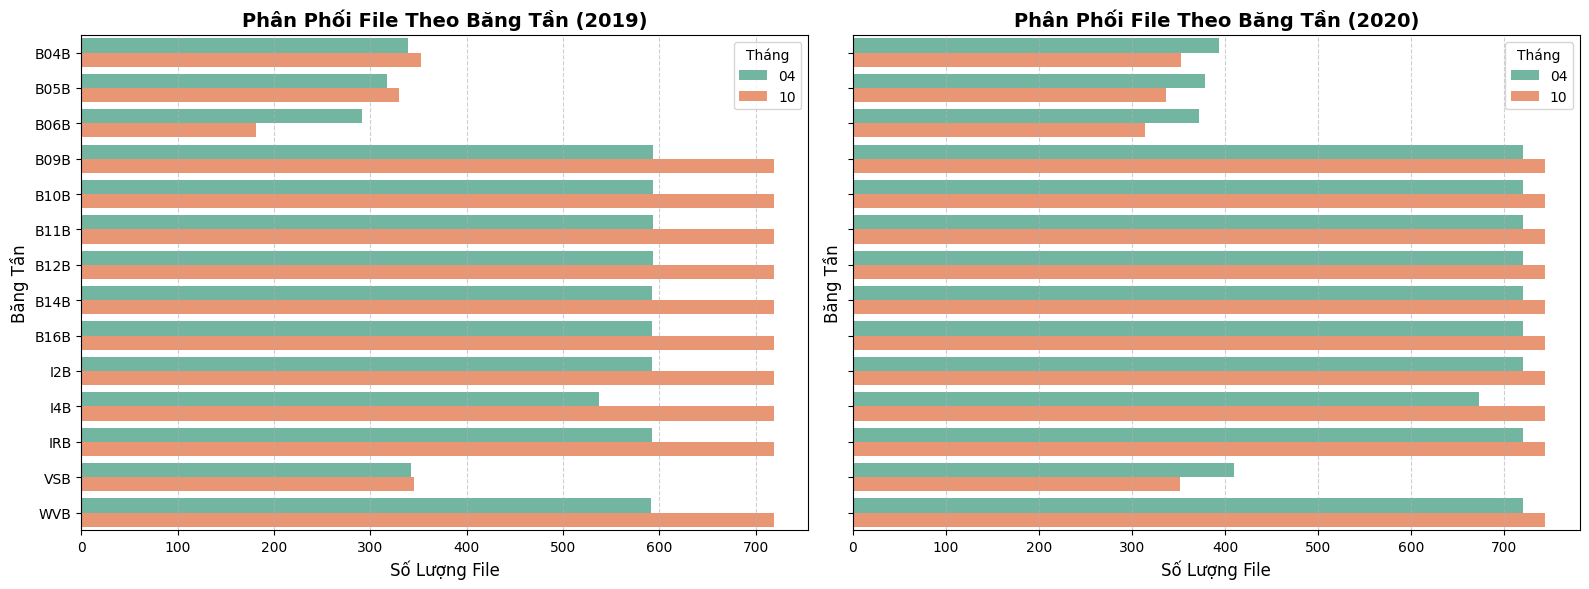

Tổng Quan Thống Kê:
    Band  Year Month  FileCount
0   B04B  2019    04        339
1   B04B  2019    10        353
2   B04B  2020    04        393
3   B04B  2020    10        353
4   B05B  2019    04        317
5   B05B  2019    10        330
6   B05B  2020    04        378
7   B05B  2020    10        336
8   B06B  2019    04        291
9   B06B  2019    10        181
10  B06B  2020    04        372
11  B06B  2020    10        314
12  B09B  2019    04        594
13  B09B  2019    10        719
14  B09B  2020    04        720
15  B09B  2020    10        744
16  B10B  2019    04        594
17  B10B  2019    10        719
18  B10B  2020    04        720
19  B10B  2020    10        744
20  B11B  2019    04        594
21  B11B  2019    10        719
22  B11B  2020    04        720
23  B11B  2020    10        744
24  B12B  2019    04        594
25  B12B  2019    10        719
26  B12B  2020    04        720
27  B12B  2020    10        744
28  B14B  2019    04        593
29  B14B  2019    10

In [11]:
file_counts_band_hima = analyze_band_files(hima_root)
plot_band_file_distribution(file_counts_band_hima)

Hầu hết các băng tần có số lượng file tương đối đồng đều.  
- Một số băng tần có số lượng file thấp hơn đáng kể, đặc biệt là `B04B`, `B05B`, `B06B`, `VSB` điều này có thể liên quan đến lỗi thu thập dữ liệu 

In [12]:
def extract_hour(filename):
    """Trích xuất giờ từ tên file Himawari"""
    if ".Z" in filename:  # Định dạng Himawari nén
        try:
            return filename.split(".Z")[1][:2]  # Lấy 2 ký tự đầu tiên sau '.Z'
        except (IndexError, ValueError):
            return None
    else:  # Định dạng mặc định (_YYYYmmddHHMMSS.tif)
        try:
            return filename.split("_")[-1][8:10]  # Lấy ký tự thứ 9-10 trong chuỗi timestamp
        except (IndexError, ValueError):
            return None

def find_missing_hours(root_dir):
    """Tìm các giờ thiếu trong dữ liệu Himawari"""
    missing_hours_per_band = defaultdict(lambda: defaultdict(list))  
    all_bands = sorted([b for b in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, b))])
    
    for band in all_bands:  
        band_path = os.path.join(root_dir, band)
        for year in os.listdir(band_path):
            year_path = os.path.join(band_path, year)
            if not os.path.isdir(year_path):
                continue
            for month in os.listdir(year_path):
                month_path = os.path.join(year_path, month)
                if not os.path.isdir(month_path):
                    continue
                num_days = calendar.monthrange(int(year), int(month))[1]  # Xác định số ngày trong tháng
                for day in range(1, num_days + 1):
                    date_str = f"{year}-{month}-{day:02d}"
                    day_path = os.path.join(month_path, f"{day:02d}")
                    existing_hours = set()
                    if os.path.isdir(day_path):
                        for filename in os.listdir(day_path):
                            if filename.endswith(".tif"):
                                hour = extract_hour(filename)
                                if hour:
                                    existing_hours.add(hour)
                    full_hours = {f"{h:02d}" for h in range(24)}
                    missing_hours = sorted(full_hours - existing_hours)
                    
                    missing_hours_per_band[band][date_str] = missing_hours
    
    return missing_hours_per_band

In [13]:
missing_hours_hima = find_missing_hours(hima_root)
for band, missing_days in missing_hours_hima.items():
    print(f"\n{band}")
    for date, hours in missing_days.items():
        if not hours:
            print(f"  {date}: Đủ dữ liệu (24/24 giờ)")
        else:
            print(f"  {date}: Thiếu {len(hours)} giờ → {hours}")
if not missing_hours_hima:
    print(" Tất cả bands đều đầy đủ dữ liệu (không thiếu giờ nào).")



B04B
  2020-10-01: Thiếu 11 giờ → ['12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-02: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-03: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-04: Thiếu 11 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
  2020-10-05: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-06: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-07: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-08: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-09: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
  2020-10-10: Thiếu 12 giờ → ['12', '13', '14', '15', '16', '17', '18', '19', '20', '21'

In [14]:
def create_missing_hours_heatmap(missing_hours_data):
    years = sorted(set(date.split('-')[0] for data in missing_hours_data.values() for date in data.keys()))
    target_months = ['04', '10']
    
    heatmap_data = []
    
    for dataset, data in missing_hours_data.items():
        for year in years:
            for month in target_months:
                for day in range(1, 32):
                    date_str = f"{year}-{month}-{day:02d}"
                    missing_hours = data.get(date_str, [])
                    heatmap_data.append({
                        'Dataset': dataset,
                        'Year': year,
                        'Month': month,
                        'Day': day,
                        'Missing_Hours': len(missing_hours)
                    })
    
    df = pd.DataFrame(heatmap_data)
    unique_datasets = df['Dataset'].unique()
    
    fig = plt.figure(figsize=(16, 4 * len(unique_datasets)))
    spec = gridspec.GridSpec(len(unique_datasets) + 1, 1, height_ratios=[0.2] + [1] * len(unique_datasets), hspace=0.05)
    
    cbar_ax = fig.add_subplot(spec[0])  
    
    max_missing_hours = df['Missing_Hours'].max()
    
    axes = []
    
    for i, dataset in enumerate(unique_datasets):  
        ax = fig.add_subplot(spec[i + 1])
        axes.append(ax)
        
        dataset_df = df[df["Dataset"] == dataset]  
        
        pivot_data = dataset_df.pivot_table(
            values='Missing_Hours', 
            index=['Year', 'Month'], 
            columns='Day', 
            fill_value=0
        )
        
        pivot_data.index = [f'{year} - Tháng {month}' for year, month in pivot_data.index]
        
        sns.heatmap(
            pivot_data,
            cmap='YlGnBu',
            annot=True,
            fmt='g',
            linewidths=0.5,
            square=True,
            vmin=0,
            vmax=max_missing_hours,
            cbar=i == 0,
            cbar_ax=cbar_ax if i == 0 else None, 
            ax=ax
        )
        
        ax.set_title(f'Dataset: {dataset}', fontsize=12)
        ax.set_xlabel('Ngày trong tháng', fontsize=10)
        ax.set_ylabel('Năm - Tháng', fontsize=10)
    
    cbar_ax.set_title('Số giờ thiếu', fontsize=12)  
    plt.show()


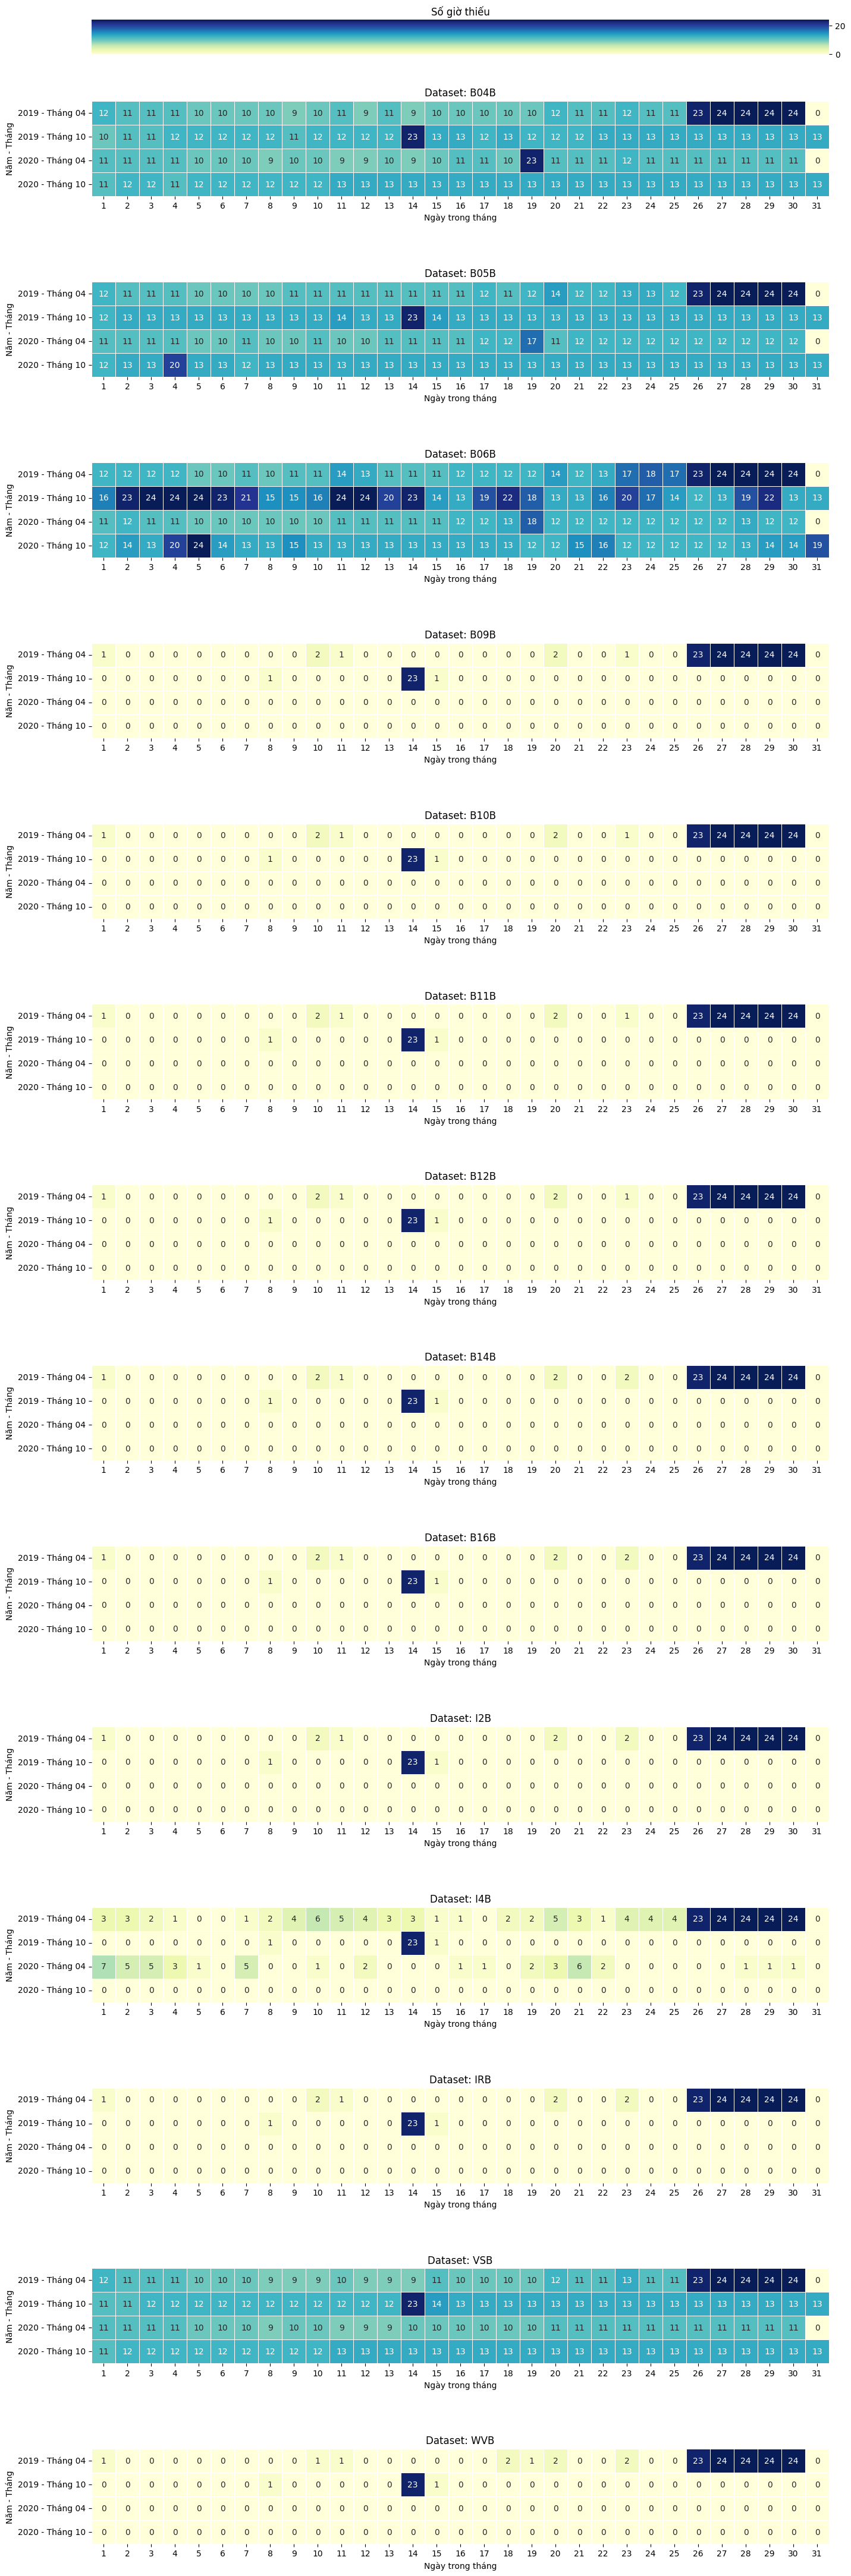

In [15]:
create_missing_hours_heatmap(missing_hours_hima)

- Dữ liệu có sự thiếu hụt theo cả **giờ** và **ngày**, thể hiện qua các vùng màu **xanh dương** trên biểu đồ.  
- Một số băng tần có mức độ thiếu dữ liệu nghiêm trọng hơn các băng khác như B04B, B05B, B06B, VSB
- Một số ngày có toàn bộ dữ liệu bị thiếu, có thể thấy qua các hàng ngang toàn màu xanh.  
- Đặc biệt, có hiện tượng mất dữ liệu đồng loạt vào giữa và cuối tháng.    


## ERA5

In [16]:
file_counts_era5, missing_days_era5 = analyze_data(era5_root)

Tổng số file mỗi ngày:
2019-04-01: 480 files
2019-04-02: 480 files
2019-04-03: 480 files
2019-04-04: 480 files
2019-04-05: 480 files
2019-04-06: 480 files
2019-04-07: 480 files
2019-04-08: 480 files
2019-04-09: 480 files
2019-04-10: 480 files
2019-04-11: 480 files
2019-04-12: 480 files
2019-04-13: 480 files
2019-04-14: 480 files
2019-04-15: 480 files
2019-04-16: 480 files
2019-04-17: 480 files
2019-04-18: 480 files
2019-04-19: 480 files
2019-04-20: 480 files
2019-04-21: 480 files
2019-04-22: 480 files
2019-04-23: 480 files
2019-04-24: 480 files
2019-04-25: 480 files
2019-04-26: 480 files
2019-04-27: 480 files
2019-04-28: 480 files
2019-04-29: 480 files
2019-04-30: 480 files
2019-10-01: 480 files
2019-10-02: 480 files
2019-10-03: 480 files
2019-10-04: 480 files
2019-10-05: 480 files
2019-10-06: 480 files
2019-10-07: 480 files
2019-10-08: 480 files
2019-10-09: 480 files
2019-10-10: 480 files
2019-10-11: 480 files
2019-10-12: 480 files
2019-10-13: 480 files
2019-10-14: 480 files
2019-10-1

Dữ liệu ERA5 có số lượng file **ổn định** (480 file/ngày) và **không có ngày nào bị thiếu** trong các tháng 04, 10 của năm 2019 và 2020. Có thể đoán là 480/24 = 20 file/1 giờ, chia đều cho đúng 20 band. Điều này cho thấy dữ liệu được thu thập **đều đặn**, cần kiểm tra thêm nội dung file để xác định biến số và tần suất thu thập chính xác.

In [17]:
missing_hours_era5 = find_missing_hours(era5_root)
any_missing_hours = False

for band, missing_days in missing_hours_era5.items():
    band_missing_hours = [date for date, hours in missing_days.items() if hours]
    
    if band_missing_hours:
        any_missing_hours = True
        print(f"\n{band}")
        for date in band_missing_hours:
            hours = missing_days[date]
            print(f"  {date}: Thiếu {len(hours)} giờ → {hours}")

if not any_missing_hours:
    print("Tất cả đều đầy đủ dữ liệu (không thiếu giờ nào).")

Tất cả đều đầy đủ dữ liệu (không thiếu giờ nào).


### **Các loại dữ liệu mưa trong thư mục `Precipitation/`**  

Thư mục `Precipitation/` chứa các dữ liệu liên quan đến mưa, gồm:  

**1. AWS (Automatic Weather Station - Trạm khí tượng tự động)**  
   - Dữ liệu mưa đo được từ các trạm đo mưa thực tế đặt trên mặt đất.  
   - Độ chính xác cao tại điểm đo nhưng phân bố thưa thớt.  
   - Có thể dùng làm **ground truth** để đánh giá mô hình dự báo mưa.  

**2. IMERG_E (Integrated Multi-satellitE Retrievals for GPM - Early Run)**  
   - Dữ liệu mưa từ vệ tinh GPM (Global Precipitation Measurement).  
   - Đây là phiên bản **Early Run (IMERG_E)**, tức là kết quả dự báo nhanh (có sai số cao hơn so với phiên bản Final Run).  
   - Cung cấp bản đồ mưa với độ phân giải **0.1° (~10km)**, cập nhật liên tục theo thời gian thực.  
   - Dùng để kiểm tra mưa trên phạm vi rộng và hỗ trợ bổ sung cho dữ liệu trạm AWS.  

 **3. Radar**  
   - Dữ liệu mưa từ hệ thống Radar thời tiết, cung cấp cường độ mưa theo không gian.  
   - Độ phân giải cao hơn vệ tinh nhưng có thể bị nhiễu bởi địa hình, nhiễu sóng.  
   - Có thể dùng để hiệu chỉnh hoặc kiểm tra chéo với dữ liệu AWS.  

---
 **AWS** → Dùng làm nhãn (label) cho mô hình học máy vì là dữ liệu thực tế.  
 **Radar & IMERG_E** → Hỗ trợ kiểm tra không gian và đánh giá mô hình.  


In [18]:
file_counts_pre, missing_days_pre = analyze_data(pre_root)

Tổng số file mỗi ngày:
2019-04-01: 72 files
2019-04-02: 72 files
2019-04-03: 72 files
2019-04-04: 72 files
2019-04-05: 72 files
2019-04-06: 72 files
2019-04-07: 72 files
2019-04-08: 72 files
2019-04-09: 72 files
2019-04-10: 72 files
2019-04-11: 72 files
2019-04-12: 72 files
2019-04-13: 72 files
2019-04-14: 72 files
2019-04-15: 72 files
2019-04-16: 72 files
2019-04-17: 72 files
2019-04-18: 72 files
2019-04-19: 72 files
2019-04-20: 72 files
2019-04-21: 72 files
2019-04-22: 72 files
2019-04-23: 72 files
2019-04-24: 72 files
2019-04-25: 72 files
2019-04-26: 72 files
2019-04-27: 72 files
2019-04-28: 72 files
2019-04-29: 72 files
2019-04-30: 72 files
2019-10-01: 72 files
2019-10-02: 72 files
2019-10-03: 72 files
2019-10-04: 57 files
2019-10-05: 48 files
2019-10-06: 48 files
2019-10-07: 43 files
2019-10-08: 60 files
2019-10-09: 39 files
2019-10-10: 57 files
2019-10-11: 72 files
2019-10-12: 72 files
2019-10-13: 72 files
2019-10-14: 72 files
2019-10-15: 60 files
2019-10-16: 54 files
2019-10-17:

In [19]:
band_counts_pre = analyze_by_band(pre_root)

for time, bands in band_counts_pre.items():
    print(f"\nSố lượng file trong tháng {time}:")
    for band, count in bands.items():
        print(f"  {band}: {count} files")


Số lượng file trong tháng 2020-10:
  AWS: 742 files
  IMERG_E: 744 files
  Radar: 724 files

Số lượng file trong tháng 2020-04:
  AWS: 718 files
  IMERG_E: 720 files
  Radar: 546 files

Số lượng file trong tháng 2019-10:
  AWS: 627 files
  IMERG_E: 744 files
  Radar: 497 files

Số lượng file trong tháng 2019-04:
  AWS: 720 files
  IMERG_E: 720 files
  Radar: 720 files


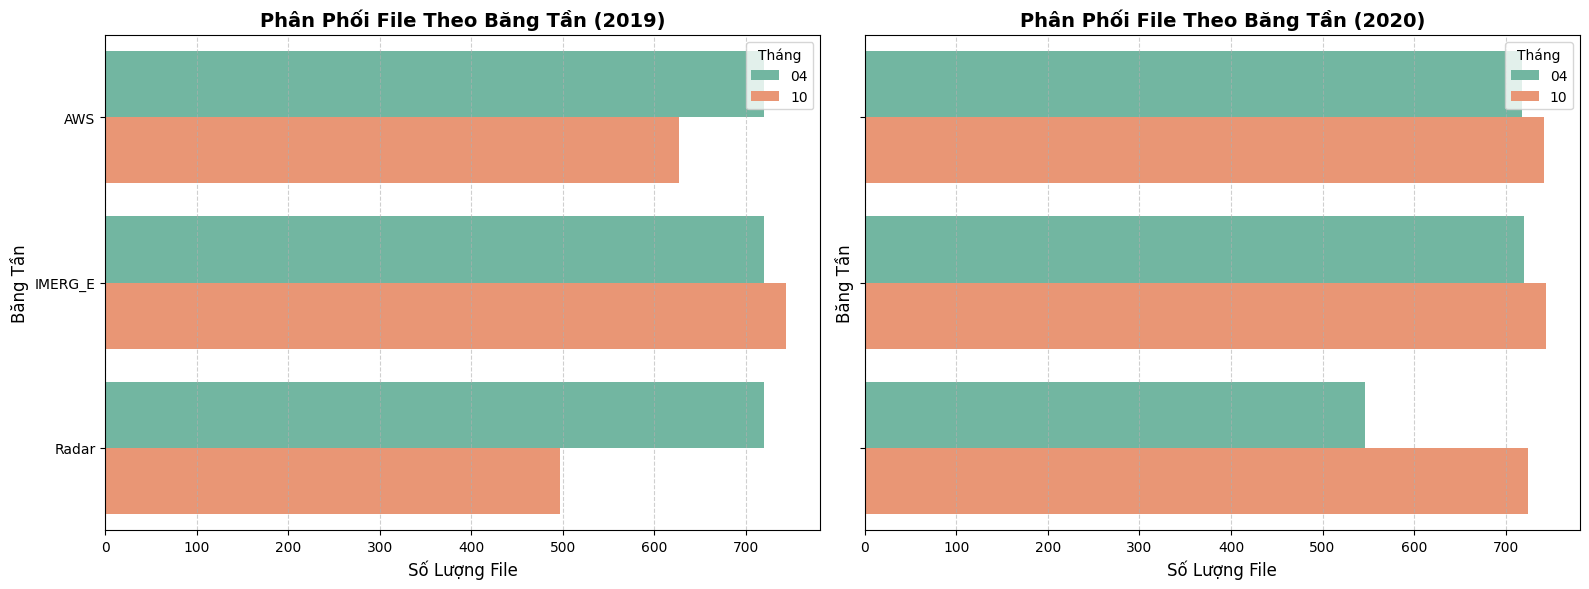

Tổng Quan Thống Kê:
       Band  Year Month  FileCount
0       AWS  2019    04        720
1       AWS  2019    10        627
2       AWS  2020    04        718
3       AWS  2020    10        742
4   IMERG_E  2019    04        720
5   IMERG_E  2019    10        744
6   IMERG_E  2020    04        720
7   IMERG_E  2020    10        744
8     Radar  2019    04        720
9     Radar  2019    10        497
10    Radar  2020    04        546
11    Radar  2020    10        724


In [20]:
file_counts_pre = analyze_band_files(pre_root)
plot_band_file_distribution(file_counts_pre)

In [21]:
missing_hours_pre = find_missing_hours(pre_root)
for band, missing_days in missing_hours_pre.items():
    print(f"\n{band}")
    for date, hours in missing_days.items():
        if not hours:
            print(f"  {date}: Đủ dữ liệu (24/24 giờ)")
        else:
            print(f"  {date}: Thiếu {len(hours)} giờ → {hours}")
if not missing_hours_pre:
    print(" Tất cả đều đầy đủ dữ liệu (không thiếu giờ nào).")


AWS
  2020-10-01: Đủ dữ liệu (24/24 giờ)
  2020-10-02: Đủ dữ liệu (24/24 giờ)
  2020-10-03: Đủ dữ liệu (24/24 giờ)
  2020-10-04: Đủ dữ liệu (24/24 giờ)
  2020-10-05: Đủ dữ liệu (24/24 giờ)
  2020-10-06: Đủ dữ liệu (24/24 giờ)
  2020-10-07: Đủ dữ liệu (24/24 giờ)
  2020-10-08: Đủ dữ liệu (24/24 giờ)
  2020-10-09: Đủ dữ liệu (24/24 giờ)
  2020-10-10: Đủ dữ liệu (24/24 giờ)
  2020-10-11: Đủ dữ liệu (24/24 giờ)
  2020-10-12: Đủ dữ liệu (24/24 giờ)
  2020-10-13: Đủ dữ liệu (24/24 giờ)
  2020-10-14: Đủ dữ liệu (24/24 giờ)
  2020-10-15: Đủ dữ liệu (24/24 giờ)
  2020-10-16: Đủ dữ liệu (24/24 giờ)
  2020-10-17: Đủ dữ liệu (24/24 giờ)
  2020-10-18: Đủ dữ liệu (24/24 giờ)
  2020-10-19: Đủ dữ liệu (24/24 giờ)
  2020-10-20: Đủ dữ liệu (24/24 giờ)
  2020-10-21: Đủ dữ liệu (24/24 giờ)
  2020-10-22: Đủ dữ liệu (24/24 giờ)
  2020-10-23: Đủ dữ liệu (24/24 giờ)
  2020-10-24: Đủ dữ liệu (24/24 giờ)
  2020-10-25: Đủ dữ liệu (24/24 giờ)
  2020-10-26: Đủ dữ liệu (24/24 giờ)
  2020-10-27: Thiếu 2 giờ → ['15'

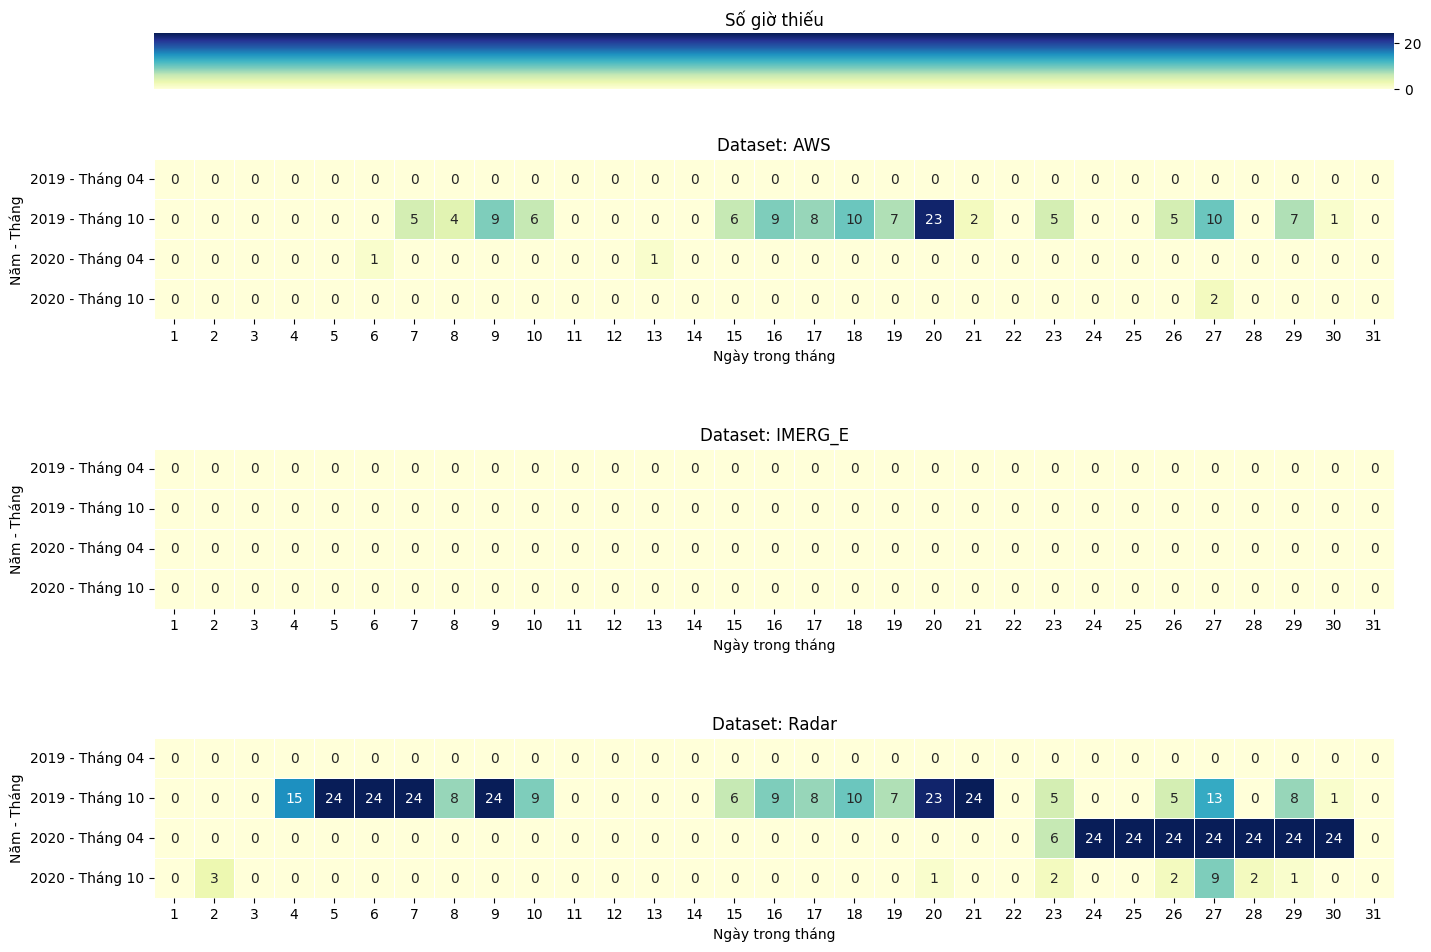

In [22]:
create_missing_hours_heatmap(missing_hours_pre)

## Một số hướng xử lý dữ liệu bị thiếu  

- **Himawari (bị thiếu một số ngày):**
  - Nếu thiếu toàn bộ ngày → Loại bỏ khỏi tập dữ liệu.  
  - Nếu chỉ thiếu một số band → Kiểm tra khả năng nội suy, nếu không được thì loại bỏ.  

- **AWS (một số điểm thiếu dữ liệu):**
  - Nếu thiếu ngẫu nhiên → Có thể thử nội suy dựa trên các phương pháp học máy, học sâu
  - Nếu thiếu nhiều hoặc liên tục → Loại bỏ thời điểm đó khỏi tập dữ liệu.  

- **ERA5 và IMERG_E (đầy đủ dữ liệu):**
 - Có thể hỗ trợ trong việc xử lý dữ liệu thiếu.

 Tuy nhiên, trong bài toán này chọn dữ liệu từ Hima, ERA5 và AWS. IMERG_E có phạm vi dữ liệu rộng hơn, trong khi AWS chỉ cung cấp dữ liệu mưa tại một điểm, điều này làm cho việc sử dụng IMERG_E không phù hợp. Dữ liệu Radar, mặc dù có độ phủ rộng hơn AWS, nhưng lại thiếu quá nhiều điểm nên cũng ko dùng